<a href="https://colab.research.google.com/github/claudiamorato/Baby-steps/blob/master/US_Wages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimum Wage by State

**Description of the data:**

Year: Year of data

State: State/Territory of data

Table_Data: The scraped, unclean data from the US Department of Labor.

Footnote: The footnote associated with Table_Data, provided by the US Department of Labor.

High.Value: As there were some values in Table_Data that had multiple values (usually associated with footnotes), this is the higher of the two values in the table. It could be useful for viewing the proposed minimum wage, because in most cases, the higher value meant that all persons protected under minimum wage laws eventually had minimum wage set at that value.

Low.Value: This is the same as High.Value, but has the lower of the two values. This could be useful for viewing the effective minimum wage at the year of setting the minimum wage, as peoples protected under such minimum wage laws made that value during that year (although, in most cases, they had a higher minimum wage after that year).

CPI.Average: This is the average Consumer Price Index associated with that year. It was used to calculate 2018-equivalent values.

High.2018: This is the 2018-equivalent dollars for High.Value.

Low.2018: This is the 2018-equivalent dollars for Low.Value.

In [11]:
import pandas as pd

df = pd.read_csv("/content/Minimum Wage Data.csv", encoding="latin")
df.to_csv("/content/minwage.csv",encoding="utf-8")

Right away, we've got some encoding issues. Looks like the user saved the formatting funky-like. Because the data was grabbed from the internet, it would have made more sense to leave it in UTF-8, but, for whatever reason, that wasn't the case, and I initially hit an encoding error on loading it in. I tried latin encoding next, and boom, there we go. Now, let's go ahead and just save our own version, with utf-8 encoding!

In [12]:
df = pd.read_csv("/content/minwage.csv")
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


# Groupby functionality
We can automatically create groups by unique column values. 

In [14]:
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


Aside from getting groups, we can also just iterate over the groups:


In [17]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
  if act_min_wage.empty:
    act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
  else:
      act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,0.0,0.00,9.00,9.00,8.28,0.00,8.28,0.0,0.0,4.68,0.0,10.08,7.20,11.52,9.00,5.04,0.0,0.0,0.00,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,0.0,3.06,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,0.0,0.00,8.53,8.53,7.85,0.00,7.85,0.0,0.0,4.44,0.0,9.56,6.83,10.92,8.53,4.78,0.0,0.0,0.00,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,0.0,2.90,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,0.0,0.00,10.32,10.32,8.06,0.00,8.06,0.0,0.0,4.19,0.0,10.32,8.38,10.32,8.06,4.51,0.0,0.0,0.00,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,0.0,6.45,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,0.0,0.00,9.89,9.89,7.73,0.00,7.73,0.0,0.0,4.02,0.0,9.89,8.04,9.89,7.73,4.33,0.0,0.0,0.00,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,0.0,6.18,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,0.0,7.49,11.38,9.58,8.38,8.38,7.49,0.0,0.0,3.89,0.0,8.38,9.58,10.48,9.58,4.49,0.0,0.0,9.58,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,0.0,5.99,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


Some stats on the data. Run a describe on the data to get various features right away:

In [18]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,1.980600,4.909800,8.076600,8.292800,6.93520,6.779200,6.301600,4.088800,3.674400,6.314400,0.0,8.191800,7.845600,8.762000,7.781400,6.656600,0.0,4.052000,5.863200,6.527800,7.583800,7.939000,8.116600,7.202200,8.298600,7.370200,6.995400,6.050400,5.48460,8.510600,7.844400,3.588400,8.323000,0.0,6.739600,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,3.561576,1.887927,1.229897,0.877401,1.00724,2.385091,1.275628,3.835916,2.466736,1.343869,0.0,0.938459,0.907239,1.121988,1.207345,1.244004,0.0,3.797229,2.251726,1.426518,0.866242,0.973408,0.882084,0.871331,1.361302,0.656855,0.870714,1.630708,2.39007,1.108701,0.852765,1.258745,0.981158,0.0,1.341918,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,0.000000,0.000000,6.220000,6.670000,4.41000,0.000000,3.830000,0.000000,0.000000,3.020000,0.0,6.510000,6.400000,6.890000,5.230000,3.490000,0.0,0.000000,0.000000,3.530000,6.060000,6.220000,6.420000,5.790000,6.180000,6.160000,4.650000,3.480000,2.04000,5.820000,6.400000,1.800000,6.390000,0.0,2.900000,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,0.000000,4.330000,7.110000,7.782500,6.42750,6.060000,5.200000,0.000000,3.082500,5.452500,0.0,7.512500,7.172500,7.932500,7.030000,6.115000,0.0,0.000000,4.707500,6.027500,6.995000,7.302500,7.512500,6.447500,7.172500,6.792500,6.412500,4.642500,2.58250,7.745000,7.302500,2.645000,7.715000,0.0,5.940000,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,0.000000,5.445000,7.795000,8.190000,7.07500,7.330000,6.285000,6.500000,3.735000,6.700000,0.0,8.065000,7.660000,8.705000,8.005000,6.895000,0.0,6.690000,5.950000,6.790000,7.465000,7.665000,8.070000,7.135000,8.195000,7.325000,7.175000,6.235000,6.80500,8.770000,7.705000,3.220000,8.230000,0.0,6.905000,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,0.000000,6.005000,8.802500,8.797500,7.71500,8.367500,7.490000,7.667500,4.562500,7.255000,0.0,8.585000,8.410000,9.385000,8.617500,7.550000,0.0,7.692500,7.432500,7.460000,8.007500,8.455000,8.675000,7.937500,9.352500,7.777500,7.655000,7.512500,7.33250,9.412500,8.327500,4.790000,8.912500,0.0,7.677500,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010

Another one that we can do is .corr() or .cov() to get correlation or covariance respectively.

In [19]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,-0.227059,-0.569150,0.787915,0.672620,0.371515,-0.504884,0.352950,-0.592920,-0.578159,-0.569134,NaN,0.784052,0.487056,0.726248,0.606292,-0.384472,NaN,-0.581392,-0.390705,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,NaN,-0.326316,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,0.896702,0.088429,0.051210,0.168391,0.448289,0.264556,0.654777,0.385053,0.444103,0.275070,NaN,0.145491,0.179236,0.464345,0.400150,-0.280747,NaN,0.427463,-0.082904,0.521086,0.180330,0.020688,0.302372,0.513394,0.327045,0.312699,0.216693,0.586746,-0.664922,0.471916,0.091265,0.653221,0.436086,NaN,0.317413,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.226320,0.473108,0.039593,0.204801,-0.006833,0.652497,-0.116454,0.278564,0.354641,0.427054,NaN,-0.059840,0.443650,-0.136325,0.113882,0.452996,NaN,0.294900,0.561894,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,NaN,0.800116,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.304550,-0.389749,0.492052,0.519241,0.623225,-0.241472,0.793831,-0.066494,-0.083699,-0.152946,NaN,0.716943,0.377899,0.942760,0.654850,-0.318507,NaN,-0.032252,-0.431631,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,NaN,-0.036787,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


For some reason, we can see that Alabama and Tennessee at least are returning NaNs. Upon looking above at the .describe(), or if we just printed the head, we'd see that Alabama, for example, reports all 0s. What's up there?

We can just move on, or we could inspect what's going on here. Let's just briefly inspect, shall we? To begin, we'll start with our "base" dataset, which is currently under the var name of df.

In [20]:
df.head()


,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [21]:
issue_df = df[df['Low.2018']==0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


Okay, how do we get them all? Well, we could just grab the uniques from the state column like:

In [22]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

Let's confirm that these are all actually problematic for us. First, let's remove the ones that we know are problematic from our correlation table:

In [23]:
import numpy as np
#axis 1 == columns. 0,default, is for rows
act_min_wage.replace(0, np.NaN). dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [28]:
#save as var:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

# Now let's see if any of the identified problems exist after we've dropped:
for problem in issue_df['State'].unique():
 if problem in min_wage_corr.columns:
    print("Missing something here....")
# Alright, there's our answer then. These states all are problematic. Can we recover from this? Let's see!
grouped_issues = issue_df.groupby("State")

grouped_issues.get_group("Alabama").head(3)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0


Right away, we can see we're missing any Footnote, High.Value, Low.Value, and the High.2018, Low.2018. Recall that the Table_Data was the "raw" data that was scraped. Here, we're getting elipses for whatever reason. Probably the scraper that grabbed this data needed to interact better with the web page. Unfortunately, this is the data we have. A final check I might do is to see if literally all of the columns are zero. There are a billion ways we could do this, but let's just...check the sum for Low.2018:

In [29]:
grouped_issues.get_group("Alabama")['Low.2018'].sum()

0.0

Looks like we just never get any value for Alabama. Let's see if this is true for all of the issues in our group.

In [31]:
for state, data in grouped_issues:
  if data['Low.2018'].sum() !=0.0:
    print ("Some data found for", state)

Looks like we wont be recovering from this, without bringing in another dataset, or maybe scraping better. 

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/minwage.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


Now, we can graph this with matplotlib. If you do not have it, you need to do a pip install matplotlib. Matplotlib has a nifty graphing function called matshow that we can use:

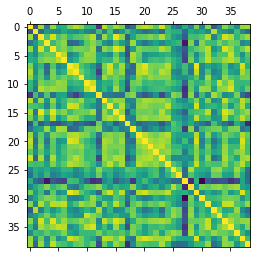

In [34]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)
plt.show()

It wouldn't be Matplotlib, however, if we didnt need to do some customization.

Again, I will just do the customization.

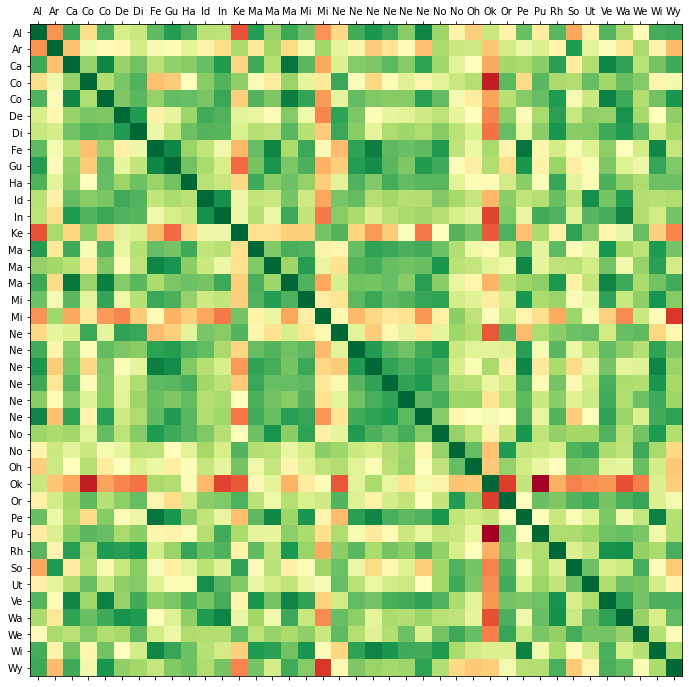

In [35]:
import matplotlib.pyplot as plt

labels = [c[:2] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

Simple abbreviations aren't cutting it. We need something better. A quick google search found me https://www.infoplease.com/state-abbreviations-and-state-postal-codes, which contains a table.

Guess what can read tables from the internet? Pandas can! You can use pd.read_html(URL) and pandas will search for any tables to populate a list of dfs with. Just remember, pd.read_html will return a list of dfs, not just one df.

In [37]:
# pip install lxml html5lib bs4
# on mac, run: /Applications/Python\ 3.7/Install\ Certificates.command


import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)


import pandas as pd

# https://www.infoplease.com/state-abbreviations-and-state-postal-codes

dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

for df in dfs:
    print(df.head())  # one is states, the other territory

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa            Â          AS
1                Guam         Guam          GU
2    Marshall Islands            Â          MH
3          Micronesia            Â          FM
4   Northern Marianas            Â          MP


In [38]:
state_abbv = dfs[0]

state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


Often sources decide to disable access, or disappear, so I may want to save this dataframe both for myself and to share with you all in case they stop allowing robot access! Saving a dataframe in pandas is easy:

In [46]:
state_abbv.to_csv("/content/state_abbv.csv")
# Bring back

state_abbv = pd.read_csv("/content/state_abbv.csv")
state_abbv.head()

,Unnamed: 0,State/District,Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


So what happened? Well, we saved and loaded with the "index," which has created duplication. A CSV file has no idea about indexes, so pandas will by default just load in all of the data as columns, and then assign a new index. We can do things like saving with no index, we can opt to save specific columns only, and we can load in and specify an index on load. For example, this time, let's save just the specific columns we're after:

In [47]:
state_abbv[["State/District","Postal Code"]]. to_csv("/content/state_abbv.csv", index=False)   #index in this case is worthless

#Then, we can do:
state_abbv = pd.read_csv("/content/state_abbv.csv", index_col=0)
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


Any time you're unsure about what you can do, you should always check out the [Pandas Docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). They are great to just scroll through, just to learn more about what you can do, but also to learn about various parameters and methods that exist that you might otherwise not realize.

For example, while we're mainly working with CSVs here, we can work with many other formats: SQL, json, HDF5, BigQuery, and much much more!

Back to the task at hand, we are trying to use the Postal Codes for our abbreviations:

In [50]:
abbv_dict = state_abbv.to_dict()
abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

We can see here that it's a dict that maps to the dict we actually want, so we can reference the codes with:

In [51]:
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

Now we can re-do our labels with:

In [52]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]  #get abbv state names

KeyError: ignored

Okay. Fine, we have to hack this one in ourselves!

In [54]:
abbv_dict['Federal (FLSA)'] = "FLSA"
labels = [abbv_dict[c] for c in min_wage_corr.columns]   #get abbv state names

KeyError: ignored

Hmm, we might have to revisit the territories, but:

In [55]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]   #get abbv state names

Okay good enough! Back to our graph now!

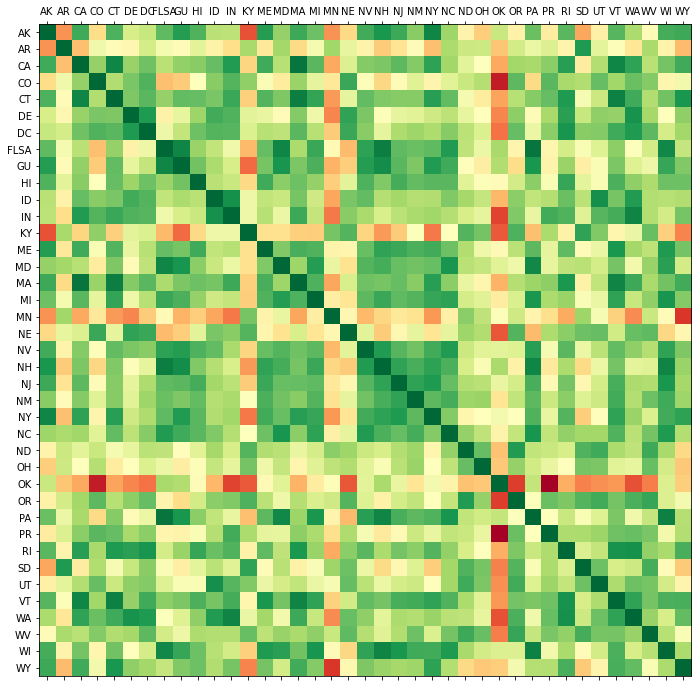

In [56]:
fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()